## Implementing DDPM in PyTorch
Let’s code a basic DDPM from scratch in PyTorch!

## Import Necessary Libraries

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt



## Define the Diffusion Model

In [9]:
class SimpleDiffusionModel(nn.Module):
    def __init__(self):
        super(SimpleDiffusionModel, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, 3, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x



## Prepare Dataset (MNIST)

In [10]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)



100%|██████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:18<00:00, 536kB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 67.7kB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:17<00:00, 94.4kB/s]
100%|██████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 397kB/s]


## Define Noise Schedule & Forward Diffusion Process

In [11]:
def add_noise(images, noise_level=0.5):
    noise = torch.randn_like(images) * noise_level
    return images + noise



## Train the Diffusion Model

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleDiffusionModel().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

num_epochs = 5

for epoch in range(num_epochs):
    for images, _ in train_loader:
        images = images.to(device)
        noisy_images = add_noise(images)
        
        optimizer.zero_grad()
        output = model(noisy_images)
        
        loss = criterion(output, images)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Save trained model
torch.save(model.state_dict(), "diffusion_model.pth")



Epoch [1/5], Loss: 0.8375
Epoch [2/5], Loss: 0.8345
Epoch [3/5], Loss: 0.8551
Epoch [4/5], Loss: 0.8354
Epoch [5/5], Loss: 0.8418


## Generate New Images

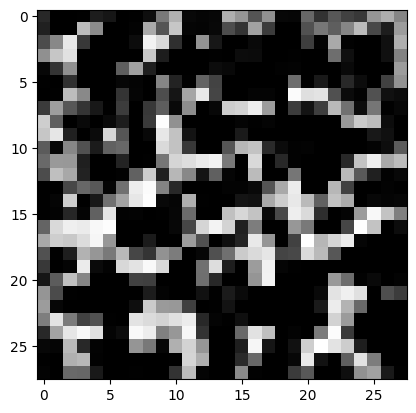

In [13]:
def generate_images(model, noise_level=0.5):
    model.eval()
    noise = torch.randn((1, 1, 28, 28)).to(device)
    with torch.no_grad():
        denoised_image = model(noise)
    return denoised_image

# Load Model
model.load_state_dict(torch.load("diffusion_model.pth"))
model.to(device)

# Generate Image
generated_img = generate_images(model).cpu().squeeze().numpy()

plt.imshow(generated_img, cmap="gray")
plt.show()



## 🎯 Final Summary
#### Defined a simple U-Net model for denoising.

#### Added noise to images and trained the model.

#### Saved the trained model for future use.

#### Generated new images by reversing the noise process.
